# Merge Sort
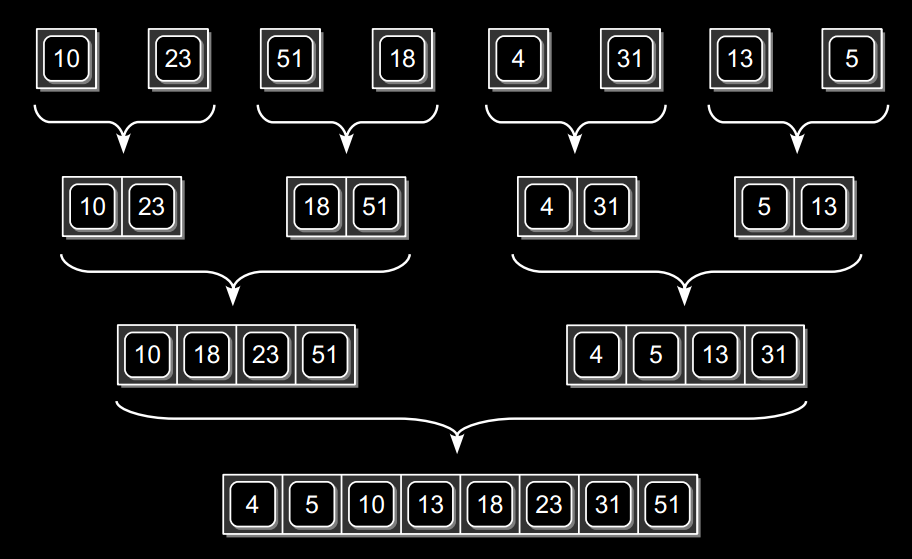

In [1]:
# Sorts a Python list in ascending order using the merge sort algorithm.
def pythonMergeSort( theList ):
    # Check the base case - the list contains a single item.
    if len(theList) <= 1 :
        return theList
    else :
        # Compute the midpoint.
        mid = len(theList) // 2

    # Split the list and perform the recursive step.
    leftHalf = pythonMergeSort( theList[ :mid ] )
    rightHalf = pythonMergeSort( theList[ mid: ] )

    #Merge the two ordered sublists.
    newList = mergeOrderedLists( leftHalf, rightHalf )
    return newList

## Improved implementation
Instead of physically creating sublists when the list is split, we can use index mark-
ers to specify a subsequence of elements to create virtual sublists within the original
physical list as was done with the binary search algorithm.

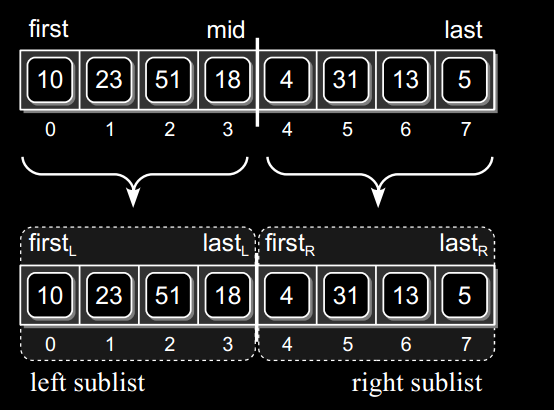

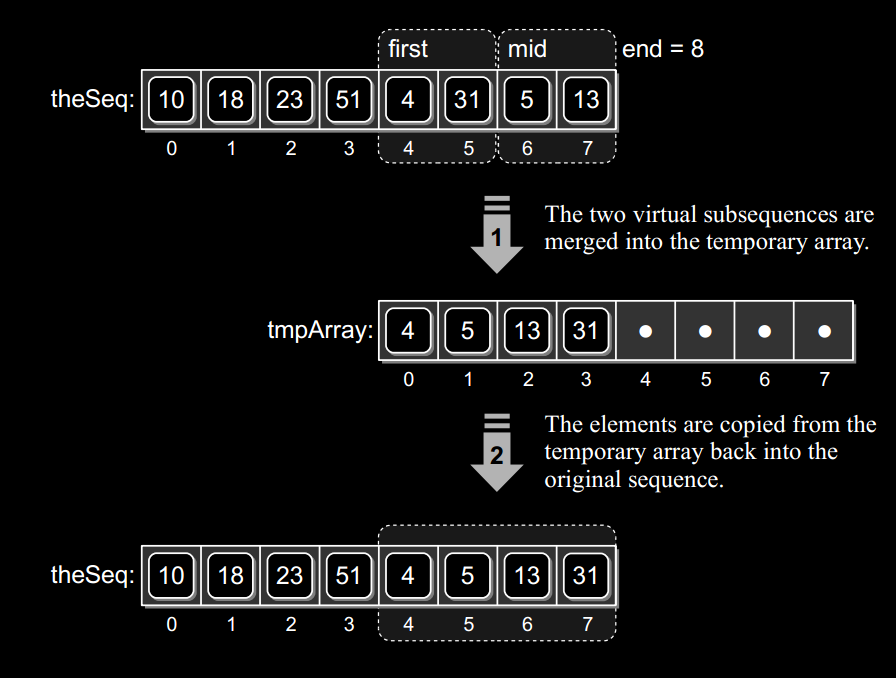

In [ ]:
# Sorts a virtual subsequence in ascending order using merge sort. 23
def recMergeSort( theSeq, first, last, tmpArray ):
    # The elements that comprise the virtual subsequence are indicated
    # by the range [first...last]. tmpArray is temporary storage used in
    # the merging phase of the merge sort algorithm. 
    # Check the base case: the virtual sequence contains a single item.
    if first == last :
        return;
    else :
    # Compute the mid point.
        mid = (first + last) // 2

        # Split the sequence and perform the recursive step.
        recMergeSort( theSeq, first, mid, tmpArray )
        recMergeSort( theSeq, mid+1, last, tmpArray )

        # Merge the two ordered subsequences.
        mergeVirtualSeq( theSeq, first, mid+1, last+1, tmpArray )

# Merges the two sorted virtual subsequences: [left..right) [right..end)
# using the tmpArray for intermediate storage. 
def mergeVirtualSeq( theSeq, left, right, end, tmpArray ):
    # Initialize two subsequence index variables.
    a = left
    b = right
    # Initialize an index variable for the resulting merged array.
    m = 0
    # Merge the two sequences together until one is empty.
    while a < right and b < end :
        if theSeq[a] < theSeq[b] :
            tmpArray[m] = theSeq[a]
            a += 1
        else :
            tmpArray[m] = theSeq[b]
            b += 1
            m += 1

    # If the left subsequence contains more items append them to tmpArray.
    while a < right :
        tmpArray[m] = theSeq[a]
        a += 1
        m += 1

    # Or if right subsequence contains more, append them to tmpArray.
    while b < end :
        tmpArray[m] = theSeq[b]
        b += 1
        m += 1

    # Copy the sorted subsequence back into the original sequence structure.
    for i in range( end - left ) :
        theSeq[i+left] = tmpArray[i]


: 

## Efficiency

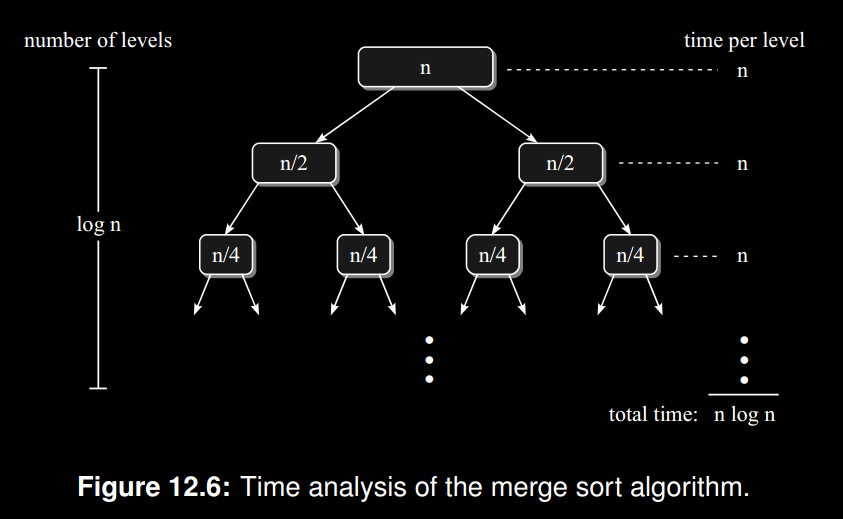

# Quick Sort

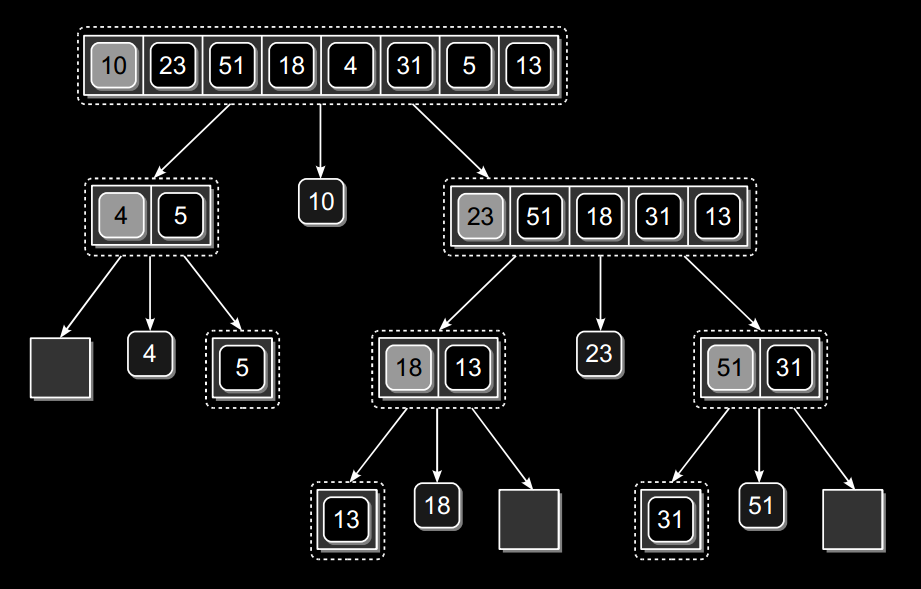

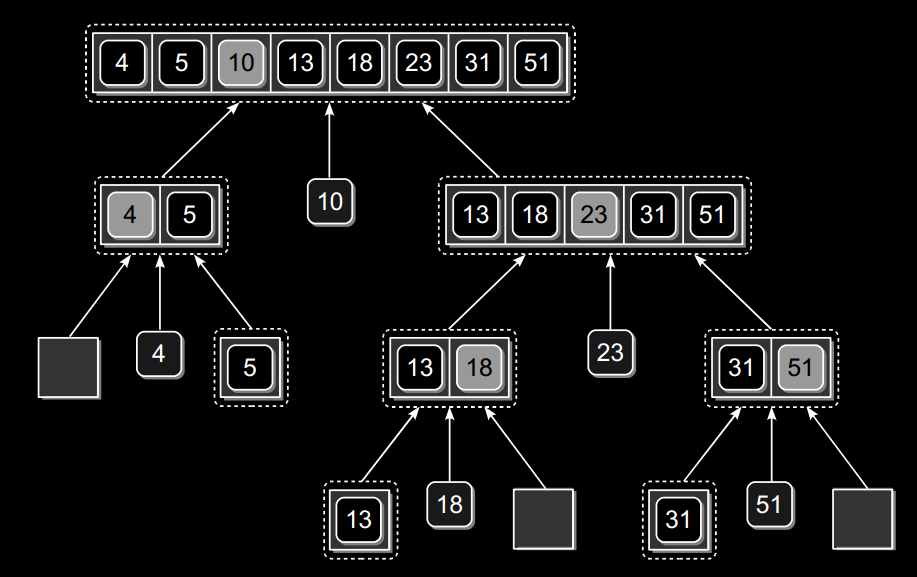

In [10]:
# Sorts an array or list using the recursive quick sort algorithm.
def quickSort( theSeq ):
    n = len( theSeq )
    recQuickSort( theSeq, 0, n-1 ) 
    
    
# The recursive implementation using virtual segments.
def recQuickSort( theSeq, first, last ):
    # Check the base case.
    if first >= last :
        return
    else :
        # Save the pivot value.
        pivot = theSeq[first]

        # Partition the sequence and obtain the pivot position.
        pos = partitionSeq( theSeq, first, last )

        # Repeat the process on the two subsequences.
        recQuickSort( theSeq, first, pos - 1 )
        recQuickSort( theSeq, pos + 1, last )

# Partitions the subsequence using the first key as the pivot.
def partitionSeq( theSeq, first, last ):
    # Save a copy of the pivot value.
    pivot = theSeq[first]

    # Find the pivot position and move the elements around the pivot.
    left = first + 1
    right = last
    while left <= right :
        # Find the first key larger than the pivot.
        while left < right and theSeq[left] < pivot :
            left += 1

        # Find the last key in the sequence that is smaller than the pivot.
        while right >= left and theSeq[right] >= pivot :
            right -= 1

        # Swap the two keys if we have not completed this partition.
        if left < right :
            tmp = theSeq[left]
            theSeq[left] = theSeq[right]
            theSeq[right] = tmp

    # Put the pivot in the proper position.
    if right != first :
        theSeq[first] = theSeq[right]
        theSeq[right] = pivot

    # Return the index position of the pivot value.
    return right

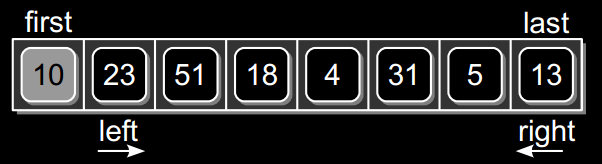
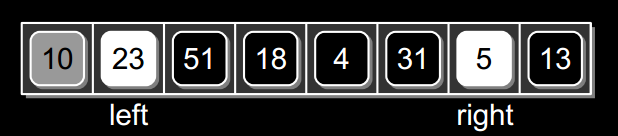
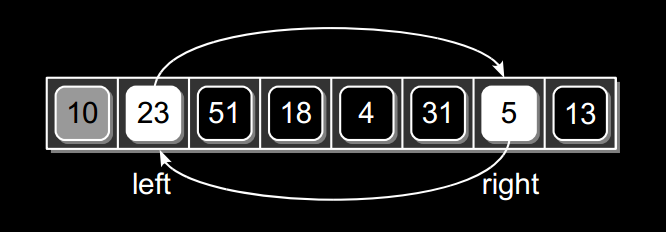
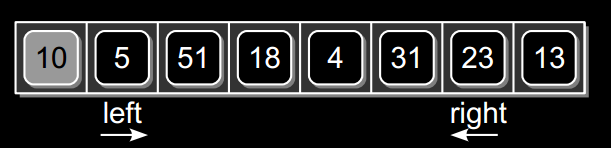
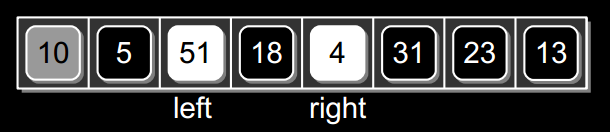

## Efficiency

The quick sort algorithm has an average or expected time of O(n log n) but runs in
O(n^2) in the worst case, the analysis of which is left as an exercise. Even though
quick sort is quadratic in the worst case, it does approach the average case in many
instances

# Radix sort

Radix sort is a distribution sort algorithm and can be used to sort many types of keys, including positive integers,
strings, and floating-point values.

The process starts by distributing the values among the various bins based on
the digits in the ones column. If keys have
duplicate digits in the ones column, the values are placed in the bins in the order
that they occur within the list.

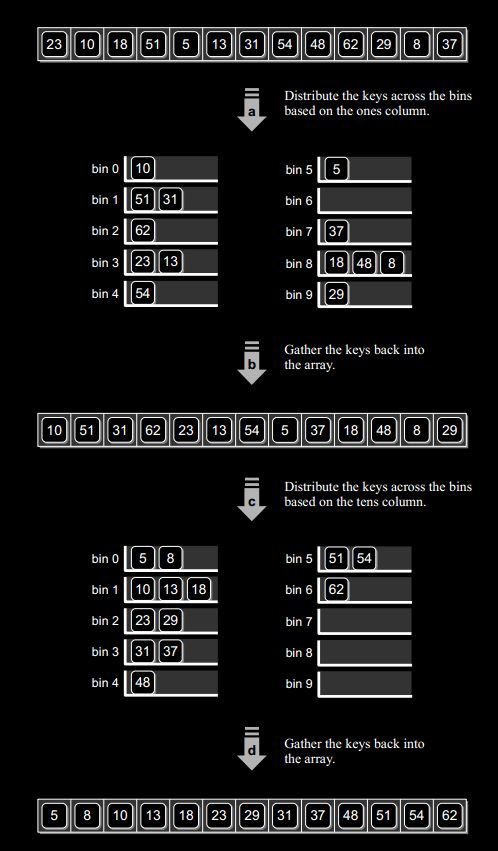

In [9]:
# Sorts a sequence of positive integers using the radix sort algorithm. 
#from llistqueue import Queue
#from array import Array 
def radixSort( intList, numDigits ):
    # Create an array of queues to represent the bins.
    binArray = Array( 10 )
    for k in range( 10 ):
         binArray[k] = Queue()

     # The value of the current column.
    column = 1

    # Iterate over the number of digits in the largest value.
    for d in range( numDigits ):

    # Distribute the keys across the 10 bins.
        for key in intList :
            digit = (key // column) % 10
            binArray[digit].enqueue( key )

        # Gather the keys from the bins and place them back in intList.
        i = 0
        for bin in binArray :
             while not bin.isEmpty() :
                intList[i] = bin.dequeue()
                i += 1

         # Advance to the next column value.
        column *= 10



IndentationError: unindent does not match any outer indentation level (<tokenize>, line 11)

## Efficiency

Assume a sequence of n keys in which each
key contains d components in the largest key value and each component contains a
value between 0 and k−1. Also assume we are using the linked list implementation
of the Queue ADT, which results in O(1) time queue operations.

The array used to store the k queues and the creation of the queues themselves
can be done in O(k) time. The distribution and gathering of the keys involves two
steps, which are performed d times, one for each component:

- The distribution of the n keys across the k queues requires O(n) time since
an individual queue can be accessed directly by subscript.
- Gathering the n keys from the queues and placing them back into the sequence
requires O(n) time. Even though the keys have to be gathered from k queues,
there are n keys in total to be dequeued resulting in the dequeue() operation
being performed n times.
The distribution and gathering steps are performed d times, resulting in a time
of O(dn). 


Combining this with the initialization step we have an overall time of
O(k+dn). The radix sort is a special purpose algorithm and in practice both k and
d are constants specific to the given problem, resulting in a linear time algorithm.
For example, when sorting a list of integers, k = 10 and d can vary but commonly
d < 10. Thus, the sorting time depends only on the number of keys.


# Sorting linked lists
## Insertion sort
We unlink each node from the linked list and add it to a new sorted list.
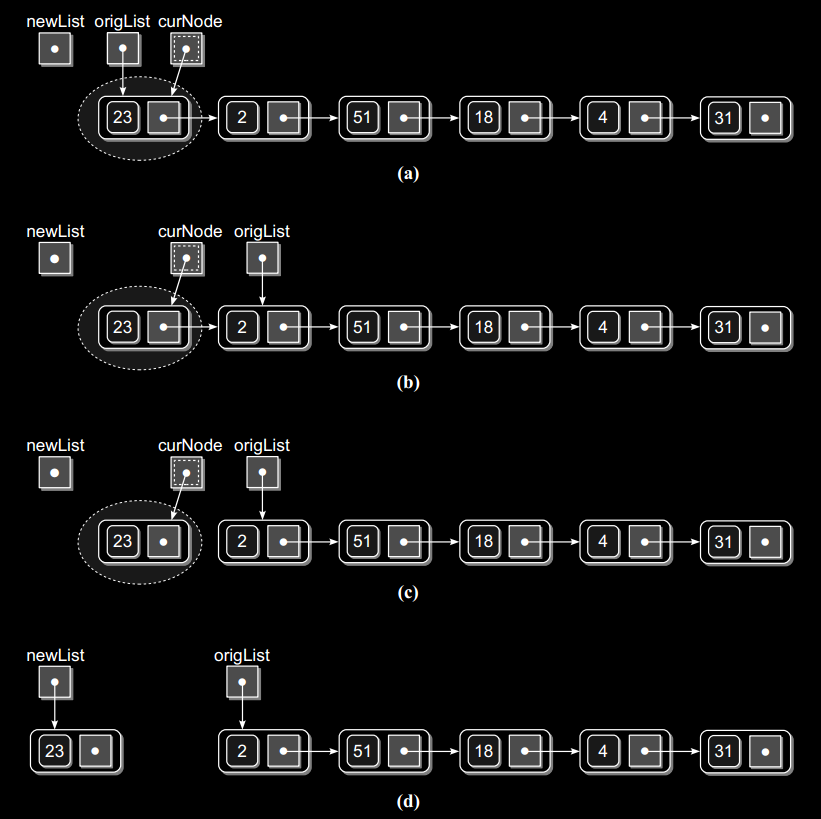

In [6]:
# Sorts a linked list using the technique of the insertion sort. A
 # reference to the new ordered list is returned. 34
def llistInsertionSort( origList ):
    # Make sure the list contains at least one node.
    if origList is None :
        return None 
    # Iterate through the original list.
    newList = None
    while origList is not None :
        # Assign a temp reference to the first node.
        curNode = origList

        # Advance the original list reference to the next node.
        origList = origList.next

        # Unlink the first node and insert into the new ordered list.
        curNode.next = None
        newList = addToSortedList( newList, curNode )

        # Return the list reference of the new ordered list.
    return newList


def addToSortedList(head, newnode):
    if head==None:
        head=newnode
        return head
    
    curnode=head
    prednode=None
    while(curnode!=None and curnode.value< newnode.value):
        prednode=curnode
        cunode=cunode.next

    if cunode==None:
        prednode.next=newnode
    if curnode==head:
        newnode.next=head
        head=newnode

    else:
        prednode.next=newnode
        newnode.next=curnode

    return head    




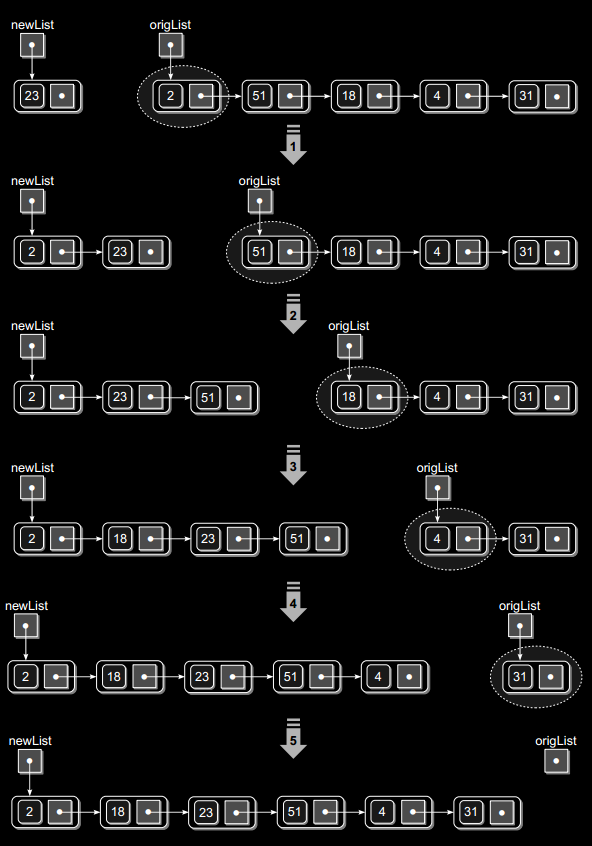

# Merge Sort

The linked list is recursively subdivided into smaller linked lists during each
recursive call, which are then merged back into a new ordered linked list.

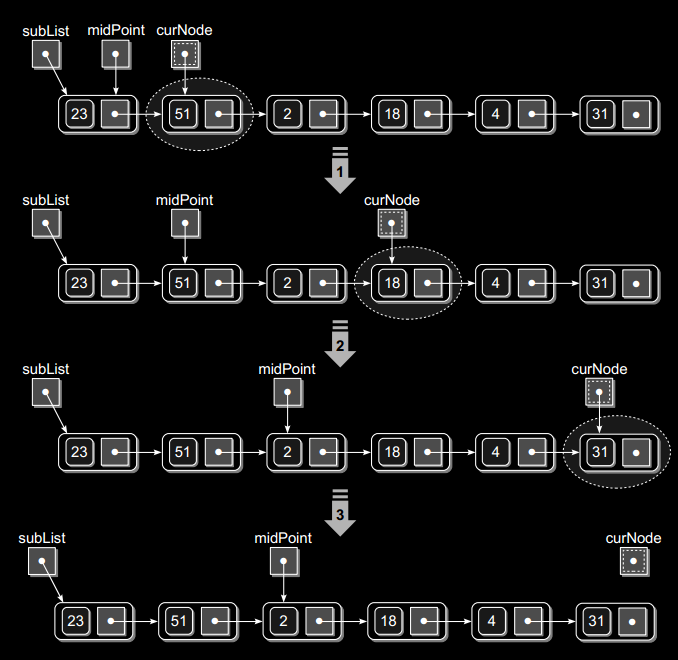

In [7]:
# Sorts a linked list using merge sort. A new head reference is returned.
def llistMergeSort( theList ): 
    # If the list is empty (base case), return None.
    if theList is None :
        return None 
    # Split the linked list into two sublists of equal size.
    rightList = _splitLinkedList( theList )
    leftList = theList

    # Perform the same operation on the left half...
    leftList = llistMergeSort( leftList )

    # ... and the right half.
    rightList = llistMergeSort( rightList )

    # Merge the two ordered sublists.
    theList = _mergeLinkedLists( leftList, rightList )

    # Return the head pointer of the ordered sublist.
    return theList

# Splits a linked list at the midpoint to create two sublists. The
# head reference of the right sublist is returned. The left sublist is
# still referenced by the original head reference.
def _splitLinkedList( subList ):

    # Assign a reference to the first and second nodes in the list.
    midPoint = subList
    curNode = midPoint.next

    # Iterate through the list until curNode falls off the end.
    #the curNode reference will advance twice as fast as the midPoint reference. 
    while curNode is not None :
        # Advance curNode to the next node.
        curNode = curNode.next

        # If there are more nodes, advance curNode again and midPoint once.
        if curNode is not None :
            midPoint = midPoint.next
            curNode = curNode.next

    # Set rightList as the head pointer to the right sublist.
    rightList = midPoint.next
    # Unlink the right sub list from the left sublist.
    midPoint.next = None
    return rightList

# Merges two sorted linked list; returns head reference for the new list.
def _mergeLinkedLists( subListA, subListB ):
    # Create a dummy node and insert it at the front of the list.
    newList = ListNode( None )
    newTail = newList

    # Append nodes to the new list until one list is empty.
    while subListA is not None and subListB is not None :
        if subListA.data <= subListB.data :
            newTail.next = subListA
            subListA = subListA.next
        else :
            newTail.next = subListB
            subListB = subListB.next

        newTail = newTail.next
        newTail.next = None

    # If self list contains more terms, append them.
    if subListA is not None :
        newTail.next = subListA
    else :
        newTail.next = subListB

    # Return the new merged list, which begins with the first node after
    # the dummy node.
    return newList.next

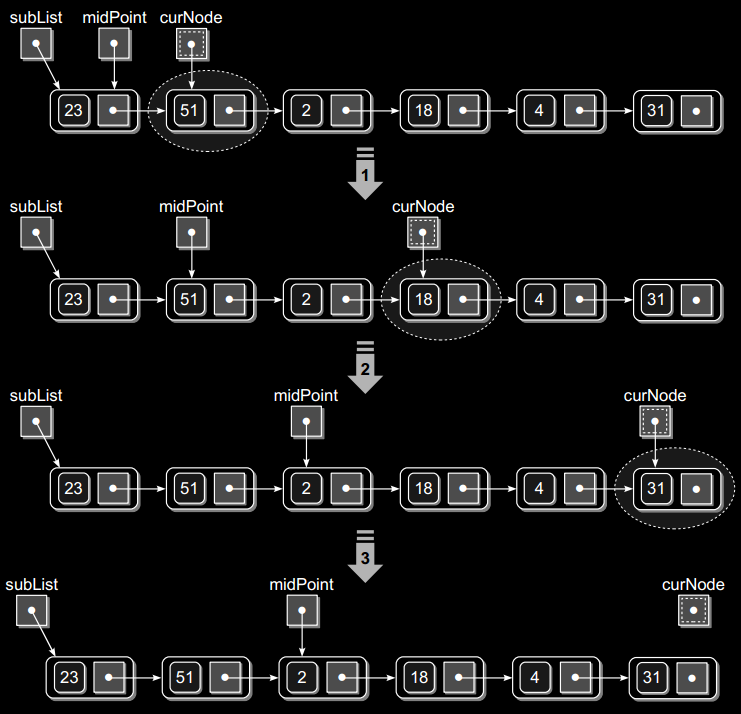
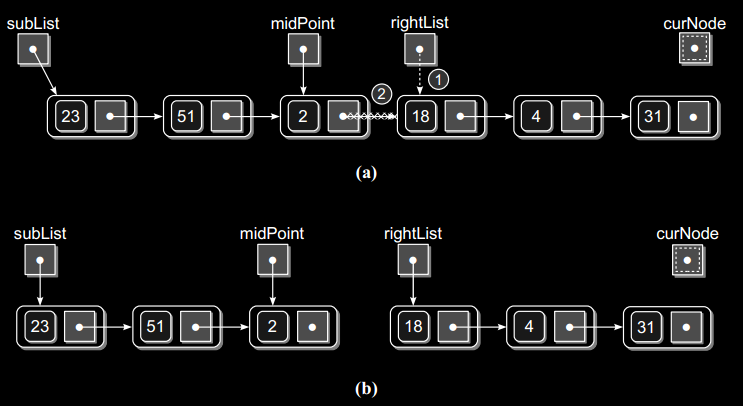
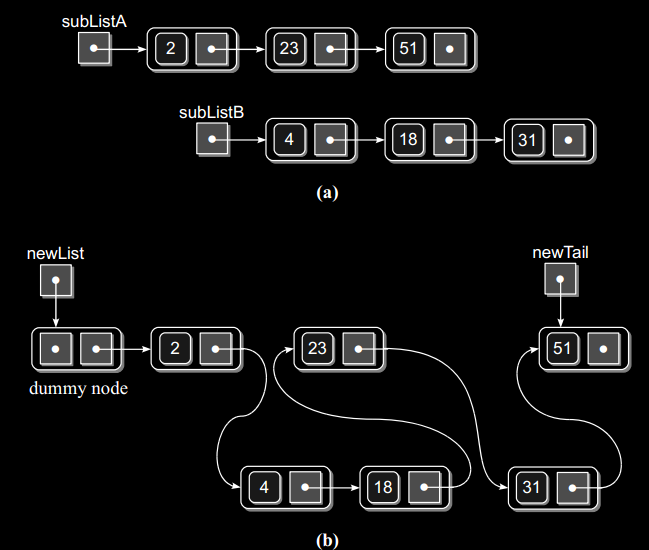